In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
df = pd.read_csv('noshow_data.csv')

# Assessing Data

In [311]:
# no of samples and columns in the dataset
df.shape

(110527, 14)

In [312]:
# Datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Observation: No missing values observed in the dataset

In [313]:
# initial look at the data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [314]:
# Handcap should be renamed to Handicap
# No-show to be renamed no_show
# convert No-show datatype from Object to boolean
# ScheduledDay and ScheduledDay change to datetime
# drop patientid and AppointmentID columns

In [315]:
df = df.rename(columns = {'Handcap': 'Handicap', 'Hipertension': 'Hypertension','No-show': 'No_show'})

In [316]:
# check the columns are renamed
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [318]:
# change categorical to numeric
df['Handicap'].unique()

array([0, 1, 2, 3, 4])

In [219]:
# lowercase all column names
def str_lowercase(col):
    return col.lower()

In [220]:
df_cols = pd.Series(df.columns)
df.columns = df_cols.apply(str_lowercase)

In [221]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [222]:
# check for outliers in data
# check if date is out of range
df.age.min(), df.age.max()

(-1, 115)

In [223]:
len(df)

110527

In [224]:
# 8 records/outliers are removed from original dataframe
df = df.query("age >=0 and age <=100")

In [225]:
len(df)

110519

In [226]:
def extract_date(d):
    return pd.to_datetime(d).date()

In [227]:
df['scheduledday']= df['scheduledday'].apply(extract_date)

In [228]:
df['appointmentday']= df['appointmentday'].apply(extract_date)

In [229]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

In [230]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [231]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [232]:
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
no_show                   object
dtype: object

In [233]:
# finding duplicate rows in the dataset
df.duplicated().sum()

0

In [234]:
# check if scheduled date is after appointment date
len(df['scheduledday'] > df['appointmentday'])

110519

In [235]:
df['waiting_time'] = (df['appointmentday'] - df['scheduledday']).dt.days

In [236]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [237]:
df['waiting_time'].min(), df['waiting_time'].max()

(-6, 179)

In [238]:
# finding out if waiting time is negative i.e appintment is booked after the appointment day 
df[df['waiting_time'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [239]:
# removing 6 rows as they're treated as outliers or human error
df = df.query("waiting_time >= 0")

In [240]:
# checking the rows are removed
df[df['waiting_time'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time


In [241]:
mapDayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df['appointmentday'].dt.dayofweek.map(mapDayOfWeek)

In [242]:
# drop patientid and appointmentid columns which are of no significance
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [243]:
df.tail(10)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,weekday
110517,F,2016-06-07,2016-06-07,19,MARIA ORTIZ,0,0,0,0,0,0,No,0,Tuesday
110518,F,2016-04-27,2016-06-07,50,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday
110519,F,2016-04-27,2016-06-07,22,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday
110520,F,2016-05-03,2016-06-07,42,MARIA ORTIZ,0,0,0,0,0,1,No,35,Tuesday
110521,F,2016-05-03,2016-06-07,53,MARIA ORTIZ,0,0,0,0,0,1,No,35,Tuesday
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,Tuesday
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,Tuesday
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday
110526,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday


In [244]:
# create DataFrame who make appoinments
show_df = df[df['no_show'] == 'No']

In [245]:
# create DataFrame who didn't make for appoinments
no_show_df = df[df['no_show'] == 'Yes']

In [246]:
show_df.shape, no_show_df.shape

((88203, 14), (22311, 14))

In [247]:
(show_df.columns == no_show_df.columns).all()

True

In [248]:
show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88203 entries, 0 to 110526
Data columns (total 14 columns):
gender            88203 non-null object
scheduledday      88203 non-null datetime64[ns]
appointmentday    88203 non-null datetime64[ns]
age               88203 non-null int64
neighbourhood     88203 non-null object
scholarship       88203 non-null int64
hypertension      88203 non-null int64
diabetes          88203 non-null int64
alcoholism        88203 non-null int64
handicap          88203 non-null int64
sms_received      88203 non-null int64
no_show           88203 non-null object
waiting_time      88203 non-null int64
weekday           88203 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 10.1+ MB


In [249]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22311 entries, 6 to 110516
Data columns (total 14 columns):
gender            22311 non-null object
scheduledday      22311 non-null datetime64[ns]
appointmentday    22311 non-null datetime64[ns]
age               22311 non-null int64
neighbourhood     22311 non-null object
scholarship       22311 non-null int64
hypertension      22311 non-null int64
diabetes          22311 non-null int64
alcoholism        22311 non-null int64
handicap          22311 non-null int64
sms_received      22311 non-null int64
no_show           22311 non-null object
waiting_time      22311 non-null int64
weekday           22311 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 2.6+ MB


# Exploring Visuals

In [252]:
no_show_df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,waiting_time
count,22311.000000,22311.000000,22311.000000,22311.000000,22311.000000,22311.00000,22311.000000,22311.000000
mean,34.307023,0.115548,0.169065,0.064094,0.030344,0.02008,0.438528,15.835642
std,21.946550,0.319690,0.374817,0.244926,0.171535,0.15601,0.496218,16.605608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,23.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,4.00000,1.000000,179.000000


In [254]:
show_df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,waiting_time
count,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000
mean,37.787297,0.093908,0.204392,0.073841,0.030418,0.022732,0.291339,8.754963
std,23.334275,0.291703,0.403259,0.261513,0.171737,0.162721,0.454382,14.550688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


## Age vs No Show

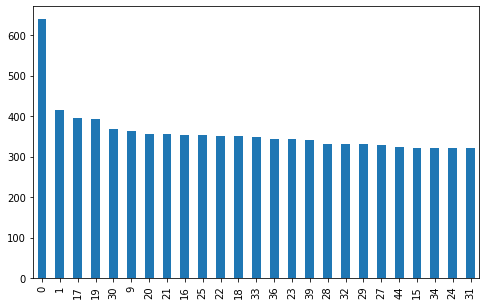

In [255]:
# mostly young children followed by young people 
no_show_df['age'].value_counts().nlargest(25).plot(kind='bar', figsize=(8, 5));

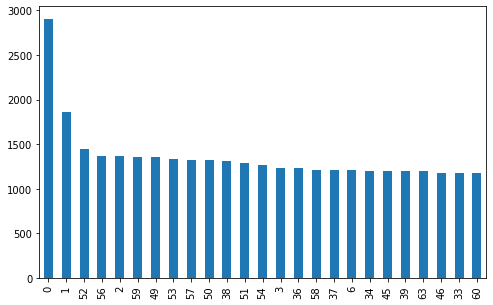

In [256]:
# majority of middle or old age people show up for appointments
show_df['age'].value_counts().nlargest(25).plot(kind='bar', figsize=(8, 5));

# Waiting Periods Vs No Show

In [259]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 0, 7, 14 , 200 ] # Fill in this list with five values you just found

In [260]:
# Labels for the four acidity level groups
bin_names = ['same_day', '1 week', '2 weeks', '2 weeks+']

In [261]:
no_show_df['waiting_periods'] = pd.cut(no_show_df['waiting_time'], bin_edges, labels=bin_names)

/Users/sarora/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [262]:
no_show_df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,weekday,waiting_periods
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,Friday,1 week
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,Friday,1 week
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3,Friday,1 week
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1,Friday,1 week
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2,Friday,1 week


In [ ]:
no_show_df.waiting_time.plot(kind='bar')

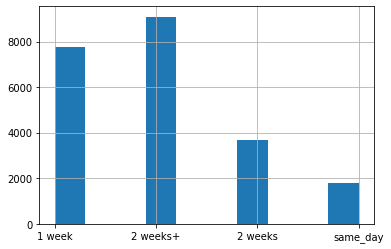

In [338]:
no_show_df.waiting_periods.hist();

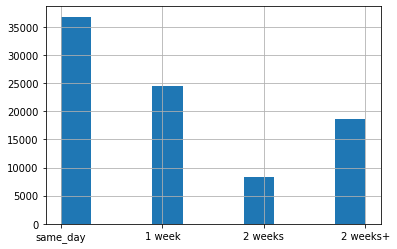

In [340]:
show_df['waiting_periods'] = pd.cut(show_df['waiting_time'], bin_edges, labels=bin_names)
show_df.waiting_periods.hist();

In [363]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


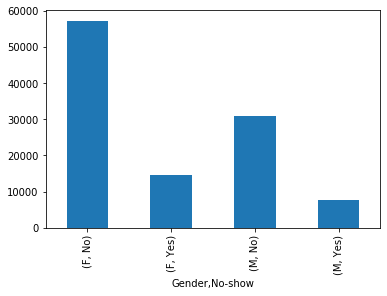

In [370]:
#df.head()
#df.groupby('No-show').groups
df.groupby(['Gender', 'No-show'])['No-show'].count().plot(kind='bar');

In [332]:
no_show_df.shape, show_df.shape

((22311, 15), (88203, 15))

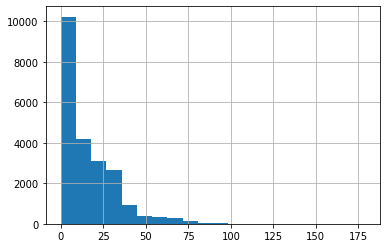

In [265]:
no_show_df['waiting_time'].hist(bins=20);

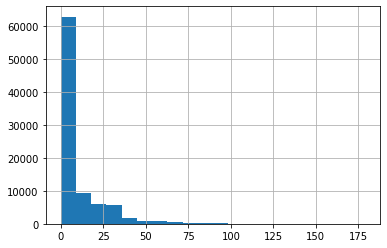

In [266]:
show_df['waiting_time'].hist(bins=20);

In [267]:
same_day_total = len(no_show_df[no_show_df['waiting_time'] < 0]) + len(show_df[show_df['waiting_time'] == 0])

In [268]:
same_day_prop = len(no_show_df[no_show_df['waiting_time'] == 0]) / len(no_show_df)
same_day_prop

0.0803191250952445

In [269]:
len(show_df[show_df['waiting_time'] == 0]) / same_day_total

1.0

In [270]:
week_total = len(no_show_df.query("waiting_time > 0 and waiting_time <= 7")) + len(show_df.query("waiting_time > 0 and waiting_time <= 7"))

In [271]:
three_day_prop = len(no_show_df.query("waiting_time > 0 and waiting_time <= 3")) / len(no_show_df)
three_day_prop

0.15046389673255345

In [272]:
one_week_prop = len(no_show_df.query("waiting_time > 3 and waiting_time <= 7")) / len(no_show_df)
one_week_prop

0.19779480973510824

In [273]:
len(show_df.query("waiting_time > 0 and waiting_time <= 7")) / week_total

0.7585606860978187

In [274]:
week_plus_total = len(no_show_df.query("waiting_time >= 7")) + len(show_df.query("waiting_time > 7"))

In [275]:
two_week_prop = len(no_show_df.query("waiting_time > 7 and waiting_time <= 14")) / len(no_show_df)
two_week_prop

0.16422392541795527

In [276]:
two_week_plus_prop = len(no_show_df.query("waiting_time > 14")) / len(no_show_df)
two_week_plus_prop

0.40719824301913854

In [277]:
len(show_df.query("waiting_time >= 7")) / week_plus_total

0.7453567342567123

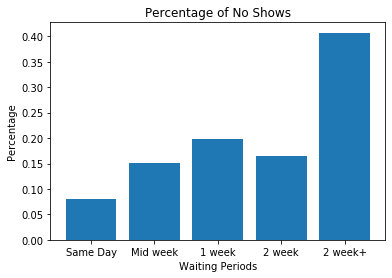

In [278]:
# Bar chart
x = ['Same Day', 'Mid week', '1 week', '2 week', '2 week+']
heights = [same_day_prop, three_day_prop,  one_week_prop, two_week_prop, two_week_plus_prop]
labels = ['Same Day', 'Mid week', '1 week', '2 week', '2 week+']
plt.bar(x, heights)
plt.title('Percentage of No Shows')
plt.xlabel('Waiting Periods')
plt.ylabel('Percentage');

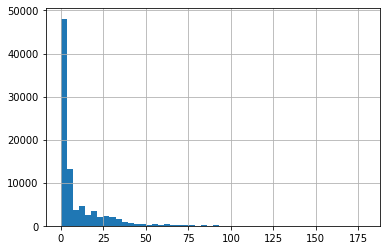

In [279]:
show_df['waiting_time'].hist(bins=50);

# Preexisting Condition Vs No-Show

In [280]:
hyper_total = len(no_show_df[no_show_df['hypertension'] == 1]) + len(show_df[show_df['hypertension'] == 1])

In [281]:
len(show_df[show_df['hypertension'] == 1]) , hyper_total

(18028, 21800)

In [282]:
len(no_show_df[no_show_df['hypertension'] == 1]) , len(no_show_df)

(3772, 22311)

In [283]:
len(no_show_df[no_show_df['hypertension'] == 1]) / hyper_total 

0.1730275229357798

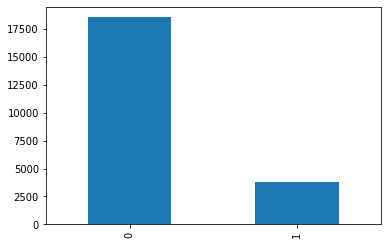

In [284]:
no_show_df['hypertension'].value_counts().plot(kind='bar');

In [285]:
pre_hyper = len(no_show_df[no_show_df['hypertension'] == 1]) / len(no_show_df)

In [286]:
pre_alcohol = len(no_show_df[no_show_df['alcoholism'] == 1]) / len(no_show_df)

In [287]:
pre_handicap = len(no_show_df[no_show_df['handicap'] == 1]) / len(no_show_df)

In [288]:
pre_diabetes = len(no_show_df[no_show_df['diabetes'] == 1]) / len(no_show_df)

In [289]:
pre_cond_list = [pre_hyper, pre_alcohol, pre_handicap, pre_diabetes]

In [308]:
no_show_df.mean()['hypertension','alcoholism','handicap','diabetes'].plot(kind='bar');

SyntaxError: invalid syntax (<ipython-input-308-5e83489c44c2>, line 1)

In [290]:
pre_cond_list

[0.16906458697503474,
 0.03034377661243333,
 0.016180359463941554,
 0.06409394469095962]

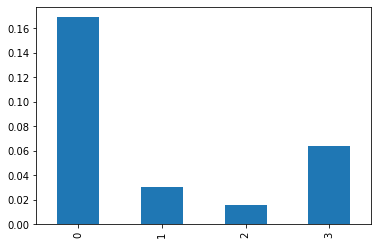

In [291]:
pd.Series(pre_cond_list).plot(kind='bar');

In [299]:
show_df.groupby(['sms_received']).mean()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,waiting_time
sms_received,,,,,,,
0,37.335456,0.095383,0.203244,0.075209,0.033805,0.025022,4.691230
1,38.886368,0.090322,0.207184,0.070514,0.022182,0.017162,18.639686


In [302]:
df.groupby(['scholarship','no_show']).mean()

age  hypertension  diabetes  alcoholism  handicap  \
scholarship no_show                                                            
0           No       38.493506      0.206657  0.075913    0.028829  0.022998   
            Yes      34.939087      0.172300  0.066234    0.026757  0.021233   
1           No       30.973319      0.182543  0.053845    0.045756  0.020162   
            Yes      29.468968      0.144298  0.047711    0.057797  0.011249   

                     sms_received  waiting_time  
scholarship no_show                              
0           No           0.292492      8.931732  
            Yes          0.435818     16.032129  
1           No           0.280212      7.049378  
            Yes          0.459271     14.331652